## packages

In [2]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
root = ET.parse('/home/luke/Downloads/sms.xml').getroot()

## reading and organizing data

In [2]:
data = []
for child in root:
    data.append([child.attrib['name'],child.attrib['body'],child.attrib['type'],child.attrib['time'],child.attrib['date'],child.attrib['address'],])
df = pd.DataFrame(data, columns=['person','content','type','time','timestamp_ms','number'])

df['source'] = 'sms'

In [3]:
#cleaning phone numbers, empty contacts

for i in ['-','+','(',')',' ']:
    df['number'] = df['number'].map(lambda x: x.replace(i,''))
df['number'] = df['number'].map(lambda x: x.lstrip('1'))

# phone number instances that didnt sync with contact name???
# uncomment, and manually fill in contacts

# dfBlank = df.loc[df['name'] == '']
# dfBlankNumbers = dfblank['number'].value_counts()
# dfBlanks = pd.DataFrame(dftest)
# dfBlanks.to_csv('blanknumbers.csv')

# read in manually entered contacts
dfCSV = pd.read_csv('blanknumbers.csv')
dfCSV['name'] = dfCSV['name'].astype(str)
for index, row in dfCSV.iterrows():
    df.loc[df['number'] == str(row['number']), 'person'] = row['name']

In [11]:
#identifying sender
df['type'] = df['type'].astype(int)

df['direction'] = np.nan
df.loc[df['type']== 2, 'direction'] = 'sent'
df.loc[df['type']== 1, 'direction'] = 'received'

df['timestamp_ms'] = df['timestamp_ms'].astype(int)
df['date'] = df['timestamp_ms']/1000
df['date'] = df['date'].astype(int)
df['date'] = pd.to_datetime(df['date'], unit='s') 

## output to csv

In [24]:
dfSMS = df[['person', 'timestamp_ms','content','date']].copy()
dfSMS['category'] = df['direction'] + ' ' + 'sms'
dfSMS.to_csv('sms.csv')

## plotting all sms

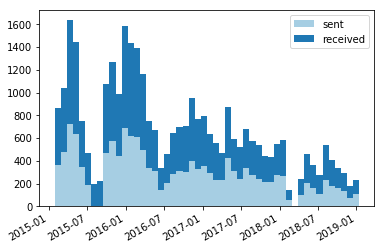

In [15]:
sentCombined = list(df[df['direction'] == 'sent']['date'])
receivedCombined = list(df[df['direction'] == 'received']['date'])

fig, ax = plt.subplots()
ax.hist([sentCombined, receivedCombined], label=['sent','received'], bins = 50, stacked=True, color=['#a6cee3','#1f78b4'])
fig.autofmt_xdate()
ax.legend()
plt.show()

## plot individual

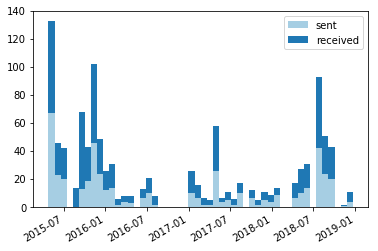

In [13]:
person = 'Bryn Culbert' #name here
dfPerson = df.loc[df['person'] == person]

dfPerson = df.loc[df['person'] == person].copy()
sent = list(dfPerson[dfPerson['direction'] == 'sent']['date'])
received = list(dfPerson[dfPerson['direction'] == 'received']['date'])

fig, ax = plt.subplots()
ax.hist([sent, received], label=['sent','received'], bins = 50, stacked=True, color=['#a6cee3','#1f78b4'])
fig.autofmt_xdate()
ax.legend()
plt.show()

## tree map

In [16]:
totalMessages = {}
people = []
messages = []

for person in df['person'].unique():
    dfTemp = df.loc[df['person'] == person]
    totalMessages[person] = dfTemp.shape[0]
    people.append(person)
    messages.append(dfTemp.shape[0])
    
messages, people = zip(*sorted(zip(messages, people)))

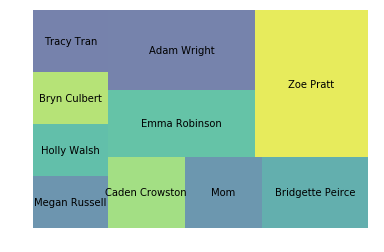

In [18]:
import squarify
squarify.plot(sizes=messages[-10:], 
              label=people[-10:], 
              alpha=.7 )
plt.axis('off')
plt.show()

In [ ]:
# word analysis

text = result['content'].str.cat(sep=' ')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download()
    
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(text) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
   
print(filtered_sentence) 